In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
# Shortest word
min(len(w) for w in words)

2

In [6]:
# Shortest word
max(len(w) for w in words)

15

In [12]:
# Generating the example of context target pairs 
for word in words[:1]:
    # word = ['<s>'] + list(w) + ['<e>']
    for i in range(len(word) - 1):
        print(word[i],word[i+1])

e m
m m
m a


In [11]:
# Shorter way to do this
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


In [15]:
# Creating a special array and adding the start token and end token
for w in words[:2]:
    w = ['<s>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

<s> e
e m
m m
m a
a <e>
<s> o
o l
l i
i v
v i
i a
a <e>


In [19]:
# In order to learn about the statictics the simplest way is by counting, 
# for that we can use a dictionary
b = {}
for w in words:
    w = ['<s>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(w, w[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [20]:
b

{('<s>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<e>'): 6640,
 ('<s>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<s>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<s>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<s>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<s>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<e>'): 3983,
 ('<s>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<s>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<e>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<e>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [21]:
# most common
sorted(b.items(), key = lambda kv: - kv[1])

[(('n', '<e>'), 6763),
 (('a', '<e>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<e>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<e>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<e>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<e>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
# it will be significntly convenient for us to keep the info in a 2 d array (27 x 27)
# instead of a python dictionary
# we'll us pytorch tensors for this

In [22]:
import torch

In [27]:
a = torch.zeros((3,5), dtype = torch.int32)

In [30]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [38]:
a[1,3] += 1

In [39]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 5, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [40]:
# creating an array for us -> 26 chars and 2 special chars 28 x 28
N = torch.zeros((28,28), dtype = torch.int32)

In [46]:
# Now we need a character to index mapping
chars = sorted(set(''.join(words)))
# stoi = {}
# for i in range(len(chars)):
#     stoi[chars[i]] = i + 1
# shorter way to do the above thing
stoi = {s : i for i,s in enumerate(chars)}
stoi['<s>'] = 26
stoi['<e>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<s>': 26,
 '<e>': 27}

In [47]:
for w in words:
    w = ['<s>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1,idx2] += 1
        # b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [48]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

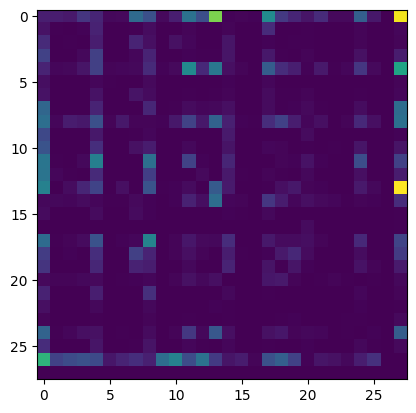

In [50]:
# The above does not look that good, thus use matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [51]:
# Even this is ugly
itos = {i:s for s,i in stoi.items()}

In [54]:
type(N[0,0])

torch.Tensor

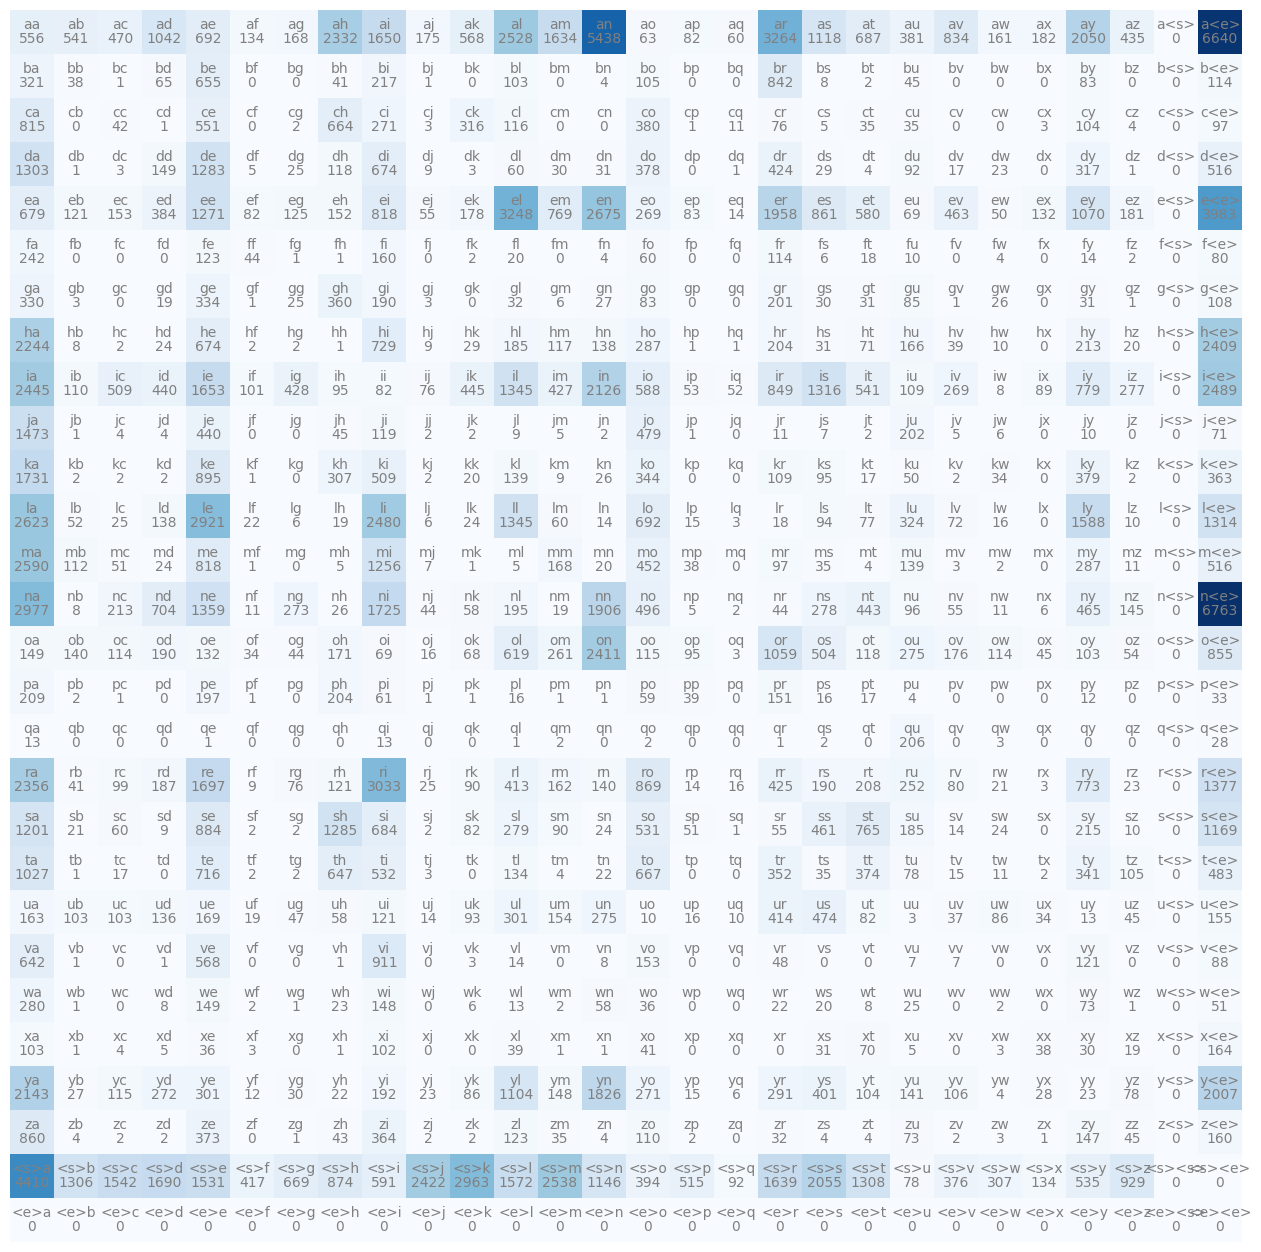

In [53]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [55]:
# We are not being very clever, we have an eb=ntire row and column of 0s 
# because the <s> will have noting befir it and <e> will have nothing after it
# Thus use a similar start and end character eg .

In [65]:
N = torch.zeros((27,27), dtype = torch.int32) # changed 28 to 27

In [66]:
# Now we need a character to index mapping
chars = sorted(set(''.join(words)))

stoi = {s : i + 1 for i,s in enumerate(chars)}
stoi['.'] = 0                                         #notice the offset by 1 i.e + 1 in prev line
# stoi

In [67]:
for w in words:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1,idx2] += 1

In [69]:
itos = {i:s for s,i in stoi.items()}

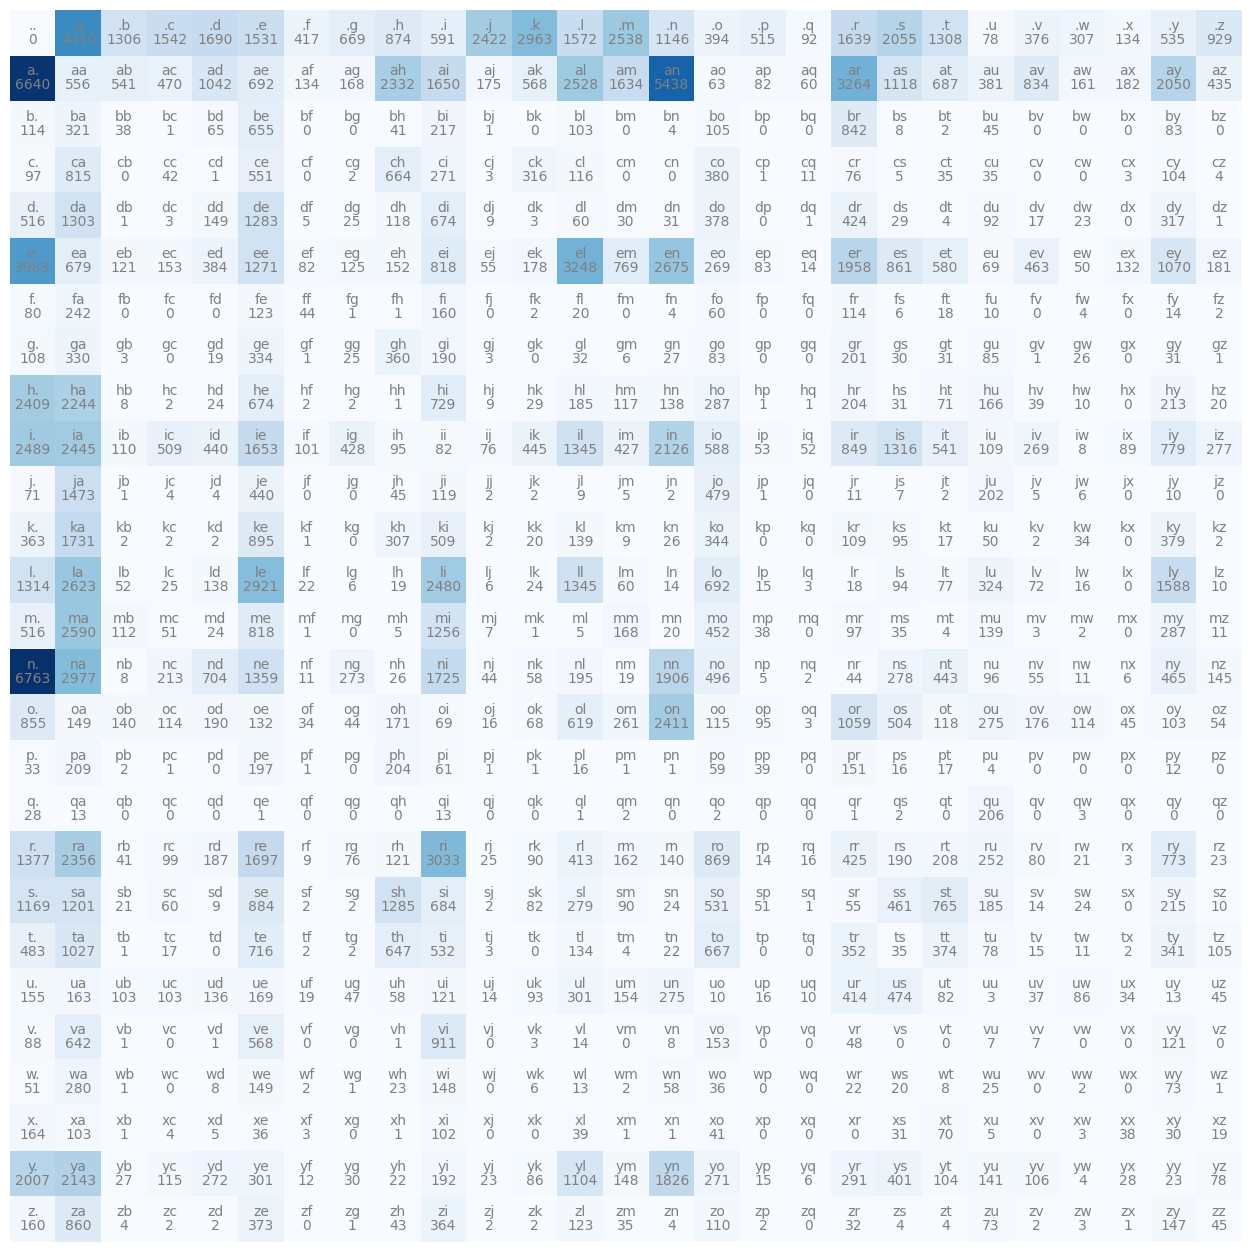

In [70]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [71]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [72]:
# We need to convert this to probs
p = N[0].float() #convert to  float as we want to normalize these counts
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [74]:
sum(p).item()

1.0

In [77]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [79]:
torch.multinomial(p, num_samples = 100, replacement = True, generator = g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [83]:
# Using this to genarate samples from  N[0]
p = N[0,:].float()
p = p / p.sum()
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
itos[ix]

'j'

In [125]:
# Thus logic to generate a sequence
name = ""
g = torch.Generator().manual_seed(2147483647)

# ix = 0       #initially its always 0
# p = N[ix,:].float()
# p = p / p.sum()
# ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
# charInName = itos[ix]
# name += charInName
for i in range(20):
    while True:
        p = N[ix,:].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        # berak condition
        if(ix == 0):
            break;
        charInName = itos[ix]
        name += charInName
    print(name)
    name = ""

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush


In [126]:
name[:]

''

In [127]:
# Fixing inefficiency
# Instead of calculating the probebilites calculate them befor hand in a matrix called P

In [136]:
# P = N.float()
# P = P / P.sum() 
# But .sum =() will return a single value

torch.Size([27])

In [142]:
# Solving doubt for which is the axis 1
a = torch.zeros((3,3))
a[1,0] = 1.0
a[1,1] = 1.0
a

tensor([[0., 0., 0.],
        [1., 1., 0.],
        [0., 0., 0.]])

In [144]:
a.sum(axis= 1, keepdim = False)

tensor([0., 2., 0.])

In [145]:
a.sum(axis= 1, keepdim = True)

tensor([[0.],
        [2.],
        [0.]])

In [146]:
a + a.sum(axis= 1, keepdim = False)

tensor([[0., 2., 0.],
        [1., 3., 0.],
        [0., 2., 0.]])

In [147]:
a + a.sum(axis= 1, keepdim = True) #this is suitable for us

tensor([[0., 0., 0.],
        [3., 3., 2.],
        [0., 0., 0.]])

In [148]:
# Final
P = N.float()
# P = P / P.sum(axis = 1, keepdim = True)     #Be careful with this as even when the axis is set correctly, 
# when keepdims is false the dim of output is still (1,27)


# Extra tip use inplace opeartions instead of the one above as it takes extra memory
# Thus
P /= P.sum(axis = 1, keepdim = True)

In [150]:
# FOR VISUALIZATION

# plt.figure(figsize=(16,16))
# plt.imshow(P, cmap='Blues')
# for i in range(27):
#     for j in range(27):
#         chstr = itos[i] + itos[j]
#         plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
#         plt.text(j, i, P[i, j].item(), ha="center", va="top", color='gray')
# plt.axis('off');

In [151]:
# Now update the logic to generate the sequence

In [152]:
P.dtype

torch.float32

In [157]:
# Thus logic to generate a sequence
name = ""
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    while True:
        p = P[ix,:]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        # berak condition
        if(ix == 0):
            break;
        charInName = itos[ix]
        name += charInName
    print(name)
    name = ""

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush


In [ ]:
# Thus elements of array P are the parameters of the model for us

In [158]:
# How to evealuate the quality of the model into a single number
# Need loss funtion

In [161]:
for w in words[:3]:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        print(f'{ch1}{ch2}: {prob:.4f}')

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960


In [162]:
# How can we summarize these probabilities into a single number that measures 
# the quality of the model


# Maximum likelyhood =>
# likelyhood = product of all the probabilities

# but produnct of entities < 1 goes towrds 0
# Thus log likelyhood

In [181]:
# Calculating the log probs
log_likelyhood = 0
n = 0
for w in words[:3]:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(log_likelyhood)
nll = - log_likelyhood #negative log likelyhood
print(f'nll = {nll}') # we want to minimize the negative log likelyhood
print(f'normalized_nll = {nll / n}') # this is the average / normalized log likelyhood 
# normalized negative log likely hood is usually the loss function the lower it is the better

# The job of training id to find paramenters (probabilities) to minimize teh nll loss

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
tensor(-38.7856)
nll = 38.78563690185547
normalized_nll = 2.424102306365967


In [182]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [183]:
# So the probabilites/parameters will be calculated by a neural network to maximize the 
# likely the likehood or minimize the normalized nll

In [187]:
# initially without training the normalized nll of the model on the train set i.e all words
log_likelyhood = 0
n = 0
for w in words:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(log_likelyhood)
nll = - log_likelyhood #negative log likelyhood
print(f'nll = {nll}') # we want to minimize the negative log likelyhood
print(f'normalized_nll = {nll / n}') # this is the average / normalized log likelyhood 

tensor(-559891.7500)
nll = 559891.75
normalized_nll = 2.454094171524048


In [196]:
# NOTE: We can evaluate probability for any word we want
log_likelyhood = 0
n = 0
for w in ["subodhjq"]:           
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(log_likelyhood)
nll = - log_likelyhood #negative log likelyhood
print(f'nll = {nll}') # we want to minimize the negative log likelyhood
print(f'normalized_nll = {nll / n}') # this is the average / normalized log likelyhood 


# Inf because jq is 0 % likely, Solution: add 1 fake counts to every count in N
# Thus N = N + 1 this smoorthens the model,
# We can also add more than 1 and the more I add the more smoother the model is
# But 1 is decent

.s: 0.0642 -2.7465
su: 0.0228 -3.7800
ub: 0.0329 -3.4157
bo: 0.0397 -3.2265
od: 0.0239 -3.7319
dh: 0.0215 -3.8411
hj: 0.0012 -6.7408
jq: 0.0000 -inf
q.: 0.1029 -2.2736
tensor(-inf)
nll = inf
normalized_nll = inf


In [197]:
# Final

P = (N+1).float()

P /= P.sum(axis = 1, keepdim = True)

In [198]:
# NOTE: We can evaluate probability for any word we want
log_likelyhood = 0
n = 0
for w in ["subodhjq"]:           
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(log_likelyhood)
nll = - log_likelyhood #negative log likelyhood
print(f'nll = {nll}') # we want to minimize the negative log likelyhood
print(f'normalized_nll = {nll / n}') # this is the average / normalized log likelyhood 


# Inf because jq is 0 % likely, Solution: add 1 fake counts to every count in N
# Thus N = N + 1 this smoothens the model,
# We can also add more than 1 and the more I add the more smoother the model is
# But 1 is decent

.s: 0.0641 -2.7468
su: 0.0229 -3.7779
ub: 0.0329 -3.4146
bo: 0.0397 -3.2271
od: 0.0240 -3.7300
dh: 0.0215 -3.8376
hj: 0.0013 -6.6390
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
tensor(-37.6879)
nll = 37.687931060791016
normalized_nll = 4.18754768371582


In [199]:
# Problem solved
# But NOTE: This can change the generations a little bit but over here it does not change

In [200]:
name = ""
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    while True:
        p = P[ix,:]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        # berak condition
        if(ix == 0):
            break;
        charInName = itos[ix]
        name += charInName
    print(name)
    name = ""

# 

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush


In [201]:
# Now we have generated a bigram model and now we want to make the alternative approach, 
# the end result will be almost the same but the approach to get there will be different
# Cast the problem of bigram char level modelling into the neural network framework  

# NN will also be a char level model i.e input single char op char that follows
# On Low level inut a single char (one hot representation) 
# output a prob distribution of the character that follows 

In [203]:
# Creating the train set for the NN of all the bigrams
xs, ys = [], []
for w in words[:1]:           
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [204]:
xs

tensor([ 0,  5, 13, 13,  1])

In [205]:
ys

tensor([ 5, 13, 13,  1,  0])

In [206]:
# How can we feed these inputs?
# We encode themm using one hot vectors
# eg for 5 we make the 5 th dimension 1 and rest are zeros

In [208]:
import torch.nn.functional as F #common way of importing
xenc = F.one_hot(xs, num_classes = 27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [209]:
xenc.shape

torch.Size([5, 27])

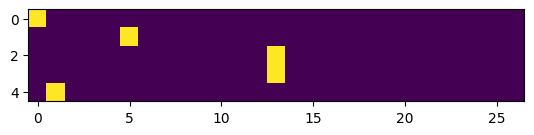

In [210]:
plt.imshow(xenc)

In [211]:
xenc.dtype 
# NOTE: we want the input to be in floating point not int while we feed the data to neural nets

torch.int64

In [212]:
xenc = F.one_hot(xs, num_classes = 27).float() 
xenc.dtype

torch.float32

In [214]:
W = torch.randn((27,1)) #draws numbers from 0 to 1 following a normal dist
xenc @ W

tensor([[ 0.4921],
        [-0.2321],
        [-0.2017],
        [-0.2017],
        [-0.4044]])

In [215]:
# (5,27) @ (27,1) = (5,1)

In [216]:
# We would like to have 27 neurons

In [218]:
W = torch.randn((27,27))
z = xenc @ W
z

tensor([[-6.6181e-01, -8.5270e-01, -7.1259e-01,  1.7743e-01,  1.6571e+00,
         -7.3640e-01,  1.1733e+00, -4.7839e-01, -5.8639e-01, -1.7101e+00,
          1.3543e+00,  2.6554e+00,  1.1738e+00, -1.1907e+00, -8.6416e-01,
          1.1033e-01, -1.6917e+00, -1.3857e+00,  1.2090e+00,  1.5742e+00,
          1.3509e+00,  4.4758e-02,  1.1482e+00, -1.0899e+00, -8.4114e-01,
          7.8082e-01,  7.9044e-01],
        [ 6.7316e-02, -9.4432e-01, -2.1972e-01, -2.3422e-01, -8.5107e-01,
          4.2022e-01, -8.9687e-02,  2.3418e-01, -1.0499e+00, -4.4586e-01,
         -4.1174e-02, -2.0169e+00, -1.2609e+00, -2.0129e+00, -2.1674e-01,
         -2.5229e+00, -1.1943e+00,  1.1493e-01, -1.5131e-01,  4.7208e-01,
          3.8756e-01,  2.0528e+00, -2.3794e-02, -1.7723e+00,  1.1500e+00,
          5.5315e-01, -1.0006e+00],
        [-8.2976e-03, -8.1062e-01,  1.8206e+00,  1.1249e+00,  1.7723e+00,
         -1.0942e+00,  1.1730e+00, -1.4696e+00, -2.4305e-01,  7.7423e-01,
          1.3958e-01,  2.8578e-01, -4.88

In [219]:
z.shape

torch.Size([5, 27])

In [220]:
# Architecture of the NN is very simple, just one layer with 27 neurons 
# and no non linear activation

In [221]:
# Now we want to produce a prob distribution for the next character, os we need some kind 
# of semantics to interpret the values of the output

In [222]:
# So we interpret that the otuput give us the log counts and we are going to exponentiate them

In [223]:
# Like this
z.exp()
# Thus all the -ve numbers turned to 0-1 and +ve numbers turned into even more +ve number

tensor([[ 0.5159,  0.4263,  0.4904,  1.1941,  5.2443,  0.4788,  3.2325,  0.6198,
          0.5563,  0.1809,  3.8741, 14.2304,  3.2343,  0.3040,  0.4214,  1.1167,
          0.1842,  0.2502,  3.3502,  4.8267,  3.8609,  1.0458,  3.1527,  0.3362,
          0.4312,  2.1833,  2.2044],
        [ 1.0696,  0.3889,  0.8027,  0.7912,  0.4270,  1.5223,  0.9142,  1.2639,
          0.3500,  0.6403,  0.9597,  0.1331,  0.2834,  0.1336,  0.8051,  0.0802,
          0.3029,  1.1218,  0.8596,  1.6033,  1.4734,  7.7893,  0.9765,  0.1699,
          3.1583,  1.7387,  0.3677],
        [ 0.9917,  0.4446,  6.1756,  3.0799,  5.8844,  0.3348,  3.2318,  0.2300,
          0.7842,  2.1689,  1.1498,  1.3308,  0.6136,  0.6725,  0.6665,  0.6829,
          1.4602,  0.9424,  2.5296,  1.9818,  1.2177,  0.3976,  0.7890,  1.3065,
          0.2974,  0.3065,  0.6741],
        [ 0.9917,  0.4446,  6.1756,  3.0799,  5.8844,  0.3348,  3.2318,  0.2300,
          0.7842,  2.1689,  1.1498,  1.3308,  0.6136,  0.6725,  0.6665,  0.6829

In [226]:
# We can interpret these exponentiated values as counts
logits = z     #logits = log counts
counts = logits.exp()  #This is similar to the N tensor
probs = counts / counts.sum(axis = 1, keepdims = True)
probs

tensor([[0.0089, 0.0074, 0.0085, 0.0206, 0.0905, 0.0083, 0.0558, 0.0107, 0.0096,
         0.0031, 0.0669, 0.2456, 0.0558, 0.0052, 0.0073, 0.0193, 0.0032, 0.0043,
         0.0578, 0.0833, 0.0666, 0.0180, 0.0544, 0.0058, 0.0074, 0.0377, 0.0380],
        [0.0355, 0.0129, 0.0266, 0.0263, 0.0142, 0.0505, 0.0303, 0.0420, 0.0116,
         0.0213, 0.0319, 0.0044, 0.0094, 0.0044, 0.0267, 0.0027, 0.0101, 0.0372,
         0.0285, 0.0532, 0.0489, 0.2586, 0.0324, 0.0056, 0.1048, 0.0577, 0.0122],
        [0.0246, 0.0110, 0.1531, 0.0763, 0.1459, 0.0083, 0.0801, 0.0057, 0.0194,
         0.0538, 0.0285, 0.0330, 0.0152, 0.0167, 0.0165, 0.0169, 0.0362, 0.0234,
         0.0627, 0.0491, 0.0302, 0.0099, 0.0196, 0.0324, 0.0074, 0.0076, 0.0167],
        [0.0246, 0.0110, 0.1531, 0.0763, 0.1459, 0.0083, 0.0801, 0.0057, 0.0194,
         0.0538, 0.0285, 0.0330, 0.0152, 0.0167, 0.0165, 0.0169, 0.0362, 0.0234,
         0.0627, 0.0491, 0.0302, 0.0099, 0.0196, 0.0324, 0.0074, 0.0076, 0.0167],
        [0.0375, 0.0324,

In [228]:
probs.shape

torch.Size([5, 27])

In [229]:
probs[0]
# We are going to interpret this as the NN's assignment of 
# how likely every on of these 27 characters are to come next

tensor([0.0089, 0.0074, 0.0085, 0.0206, 0.0905, 0.0083, 0.0558, 0.0107, 0.0096,
        0.0031, 0.0669, 0.2456, 0.0558, 0.0052, 0.0073, 0.0193, 0.0032, 0.0043,
        0.0578, 0.0833, 0.0666, 0.0180, 0.0544, 0.0058, 0.0074, 0.0377, 0.0380])

In [230]:
# Now can we optimize the w such that the probabilites coming out are pretty good

In [231]:
# Measure of pretty good = loss function

In [232]:
# -----------------------Summary start--------------------------

In [233]:
xs

tensor([ 0,  5, 13, 13,  1])

In [234]:
ys

tensor([ 5, 13, 13,  1,  0])

In [237]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((27, 27), generator=g)

In [238]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# NOTE: Btw the last 2 lines here are together called a 'softmax'

In [239]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
        0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
        0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.05734505504369736
log likelihood: -2.858668565750122
negative log likelihood: 2.858668565750122
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
        0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
        0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [ ]:
# Now we want to minimize the loss which is made of 
# differentiable opeartions and tuning the W's 
# and finding a good setting of the w matirx using gradient based optimization

In [240]:
# ------------------OPTIMIZATION START YAY--------------------------

In [241]:
xs

tensor([ 0,  5, 13, 13,  1])

In [242]:
ys

tensor([ 5, 13, 13,  1,  0])

In [243]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g)

In [245]:
# Forward pass
xenc = F.one_hot(xs, num_classes = 27).float() #input to the network one-hot encoded
logits = xenc @ W #predict logits-counts
counts = logits.exp() #counts equivalent to N
probs = counts / counts.sum(axis = 1, keepdims = True) #probabilities for the next character

In [ ]:
# Loss calculation
# We are not using MSE but we are using NLL 
# because we are doing classification and not regression
# Equivalent to negative log likelyhood calculated earlier

In [246]:
probs.shape

torch.Size([5, 27])

In [250]:
# So for each example we 
# for first example we are interested in
print(probs[0,5])
# for second example we are interested in
print(probs[1,13])
# for third example we are interested in
print(probs[2,13])
# for fourth example we are interested in
print(probs[3,1])
# for fifth example we are interested in
print(probs[4,0])

# But we want a more efficient way to access these probabilities
# One way to do this
probs[torch.arange(5), ys]    #plucks out the probabilities that the NN assigns 
# to the correct next character

tensor(0.0123)
tensor(0.0181)
tensor(0.0267)
tensor(0.0737)
tensor(0.0150)


tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [251]:
# We actually take a look at the log probabilities
loss = probs[torch.arange(5), ys].log().mean()
lossbb

tensor(-3.7693)

In [254]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True) #NOTE that requires 
# grad = True is very important

In [283]:
# Updated forward pass
# Forward pass
xenc = F.one_hot(xs, num_classes = 27).float() #input to the network one-hot encoded
logits = xenc @ W #predict logits-counts
counts = logits.exp() #counts equivalent to N
probs = counts / counts.sum(axis = 1, keepdims = True) #probabilities for the next character
loss = -probs[torch.arange(5), ys].log().mean()

In [284]:
loss

tensor(3.7291, grad_fn=<NegBackward0>)

In [285]:
# Backward pass
W.grad = None #resetting to zero, resettign to zero is also possible but None is more efficient
loss.backward()

In [286]:
print(W.grad.shape)

torch.Size([27, 27])


In [287]:
print(W.shape)

torch.Size([27, 27])


In [288]:
# Update parameters
W.data -= 0.1 * W.grad

In [299]:
# imports
import torch.nn.functional as F

# Puttin it all togeather
xs, ys = [], []
for w in words[:]:        #remove the one to generate the entire dataset   
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("Number of examples", num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True)

Number of examples 228146


In [301]:
# gradient decsent
epochs = 100
for k in range(epochs):

    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float() #input to the network: one hot encoding
    logits = xenc @ W #prodicts the log-counts
    counts = logits.exp() # equivalent to N i.e frequency counts
    probs = counts / counts.sum(axis = 1, keepdims = True)
    
    # loss
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() 
    # loss with 
    print(f"loss after epoch {k}: ",loss.item(), )
    
    # zero grad
    W.grad = None
    
    # backward pass
    loss.backward()
    
    # update params
    W.data -= 50 * W.grad   # decrease was very sloght for learnign rate = 0.1 so increase it

loss after epoch 0:  2.4726529121398926
loss after epoch 1:  2.4724340438842773
loss after epoch 2:  2.4722204208374023
loss after epoch 3:  2.472010850906372
loss after epoch 4:  2.4718058109283447
loss after epoch 5:  2.471605062484741
loss after epoch 6:  2.4714088439941406
loss after epoch 7:  2.471216917037964
loss after epoch 8:  2.4710278511047363
loss after epoch 9:  2.470843553543091
loss after epoch 10:  2.4706625938415527
loss after epoch 11:  2.4704854488372803
loss after epoch 12:  2.4703118801116943
loss after epoch 13:  2.4701414108276367
loss after epoch 14:  2.4699742794036865
loss after epoch 15:  2.4698104858398438
loss after epoch 16:  2.46964955329895
loss after epoch 17:  2.469492197036743
loss after epoch 18:  2.4693377017974854
loss after epoch 19:  2.4691858291625977
loss after epoch 20:  2.4690370559692383
loss after epoch 21:  2.468891143798828
loss after epoch 22:  2.468747615814209
loss after epoch 23:  2.468606472015381
loss after epoch 24:  2.468468427658

In [302]:
# What should be the target loss -> what we had earlier using the table

In [306]:
NOTE = """Now we only have one character at the input but when we take this
forward we will have multiple characters that come before as input,
making a table for one character input and output is easy but doing 
it for multiple character input and single output is complex and requires large space 
Thus NN approach is more flexible in this case"""

In [308]:
# Remember somoothing, we also have something equiavalent in gradient based approach
# Initialization of W, it is random, if its zero or equal to each other the effect 
# is similar to smoothing
# So trying to incentivize W to be closer to zero is equivalent to smoothing, 
# the more we incentivize it to be closer to 0 the more smoother the prob distribution will be

In [310]:
# This brings us to regularization, in which we augment the loss function to have a 
# small component called regularization loss
print((W**2).sum().item())
# OR
print((W**2).mean().item()) #if sum is too large

# loss term has this, which incentivizes the W terms to be closer to 0
# Strength of regularization is controlled by the regularization paramenter in NN which is 0.01
# above and the P = (N + reg_param ).N.sum(....)  in the tabular approach by reg_param which is
# a int

1536.7532958984375
2.1080291271209717


In [314]:
# Sampling from th BLM (Bigram language model)
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647 + 32)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

grazaylim.
h.
stetra.
zin.
zay.
